In [1]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
env = gym.make("MountainCar-v0")

In [3]:
episodes = 1000
episodes_display = 10

In [4]:
ep_rewards = []
ep_rewards_table = {'ep': [], 'avg': [], 'min': [], 'max': []}

for episode in range(episodes):
    episode_reward = 0
    done = False
    state = env.reset()[0]

    # Determinar si se debe renderizar el estado en este episodio
    render_state = episode % episodes_display == 0

    while not done:
        action = random.choice([0, 1, 2])  # Selección aleatoria de la acción (izquierda, no hacer nada, derecha)
        
        # Ejecutar la acción en el entorno
        new_state, reward, done, _, _ = env.step(action)
        
        # Renderizar el estado si es necesario
        if render_state:
            env.render()
        
        state = new_state
        episode_reward += reward

    ep_rewards.append(episode_reward)
    
    if episode % episodes_display == 0:
        avg_reward = sum(ep_rewards[-episodes_display:]) / len(ep_rewards[-episodes_display:])
        ep_rewards_table['ep'].append(episode)
        ep_rewards_table['avg'].append(avg_reward)
        ep_rewards_table['min'].append(min(ep_rewards[-episodes_display:]))
        ep_rewards_table['max'].append(max(ep_rewards[-episodes_display:]))
        print(f"Episode:{episode} avg:{avg_reward} min:{min(ep_rewards[-episodes_display:])} max:{max(ep_rewards[-episodes_display:])}")

env.close()


/Users/ruthjorganestorres/anaconda3/envs/gym/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/Users/ruthjorganestorres/anaconda3/envs/gym/lib/python3.9/site-packages/gymnasium/envs/classic_control/mountain_car.py:174: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("MountainCar-v0", render_mode="rgb_array")
  gym.logger.warn(


Episode:0 avg:-46903.0 min:-46903.0 max:-46903.0
Episode:10 avg:-53288.1 min:-152051.0 max:-11890.0
Episode:20 avg:-60821.6 min:-182484.0 max:-2985.0
Episode:30 avg:-46631.6 min:-112090.0 max:-6386.0
Episode:40 avg:-25346.6 min:-44914.0 max:-1891.0
Episode:50 avg:-28124.9 min:-49377.0 max:-8776.0
Episode:60 avg:-47466.6 min:-120736.0 max:-3710.0
Episode:70 avg:-28295.7 min:-70766.0 max:-7549.0
Episode:80 avg:-44992.0 min:-130876.0 max:-4176.0
Episode:90 avg:-34318.6 min:-67341.0 max:-12478.0
Episode:100 avg:-40415.4 min:-97374.0 max:-3256.0
Episode:110 avg:-47441.6 min:-214248.0 max:-8079.0
Episode:120 avg:-43006.3 min:-121754.0 max:-10226.0
Episode:130 avg:-51760.8 min:-139347.0 max:-7095.0
Episode:140 avg:-25285.7 min:-51283.0 max:-7072.0
Episode:150 avg:-37665.2 min:-159827.0 max:-1126.0
Episode:160 avg:-44560.4 min:-109490.0 max:-5238.0
Episode:170 avg:-25727.7 min:-78786.0 max:-4132.0
Episode:180 avg:-64486.1 min:-143917.0 max:-13911.0
Episode:190 avg:-31974.2 min:-120316.0 max:-2

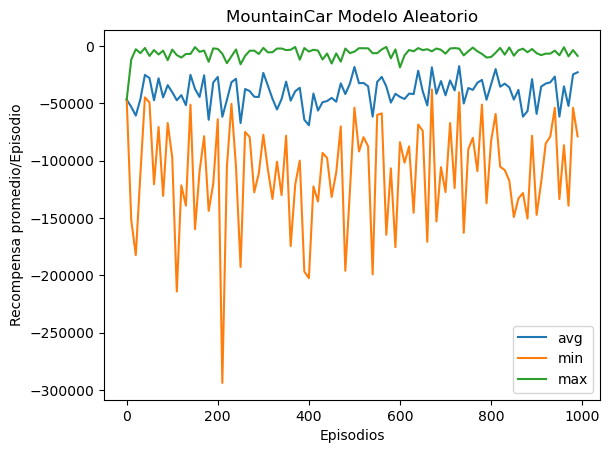

In [5]:
plt.plot(ep_rewards_table['ep'], ep_rewards_table['avg'], label="avg")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['min'], label="min")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['max'], label="max")
plt.legend(loc=4)
plt.title('MountainCar Modelo Aleatorio')
plt.ylabel('Recompensa promedio/Episodio')
plt.xlabel('Episodios')
plt.show()

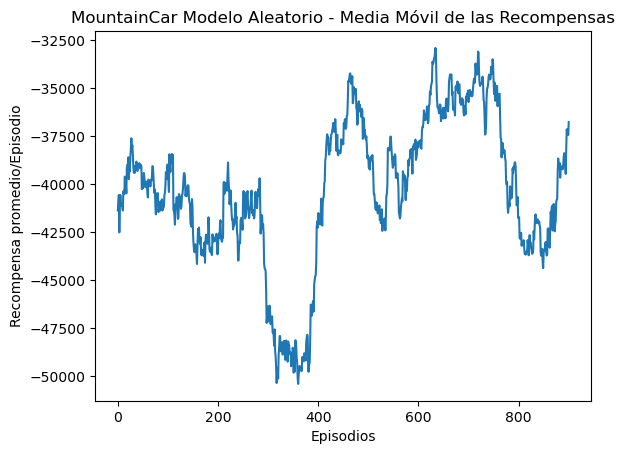

In [6]:
# Cálculo de la media móvil
window_size = 100
moving_avg_rewards = np.convolve(ep_rewards, np.ones(window_size)/window_size, mode='valid')

# Graficar la recompensa promedio móvil
plt.plot(np.arange(len(moving_avg_rewards)), moving_avg_rewards)
plt.title('MountainCar Modelo Aleatorio - Media Móvil de las Recompensas')
plt.ylabel('Recompensa promedio/Episodio')
plt.xlabel('Episodios')
plt.show()

In [7]:
# Calcular la tasa de convergencia
convergence_rate = (ep_rewards_table['avg'][-1] - ep_rewards_table['avg'][0]) / len(ep_rewards_table['avg'])
print("Tasa de convergencia:", convergence_rate)

Tasa de convergencia: 238.361
